# **Atividade Dissertativa**

**Disciplina: Séries Temporais**

**prof: Sérgio Assunção Monteiro, DSc**

**Aluno: Marcos Eduardo Souza Marques Miranda de Oliveira**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_squared_error

import plotly.io as pio
import plotly.offline as py
import plotly.graph_objs as go



# Exercício 1:

Gerar 100 valores diários com início em janeiro de 2021 seguindo a distribuição normal com média 5,0 e variância 1,0. 

In [ ]:
import random
dados = np.random.normal(5,1,100)
#for i in range(0,100):
#    n =  np.random.normal(90,270)
#    dados.append(n)
print(len(dados))

100


In [ ]:
tamanho  = len(dados)
df = pd.DataFrame(dict(data=pd.date_range("2020-1-1", 
                                           periods=tamanho),
                       valor=dados))


In [ ]:
df.describe()

,valor
count,100.000000
mean,4.989736
std,1.058785
min,2.373113
25%,4.284250
50%,5.034110
75%,5.807273
max,7.317156


In [ ]:
with pd.option_context('display.max_rows',10):
  print(df)

         data     valor
0  2020-01-01  4.290465
1  2020-01-02  5.787936
2  2020-01-03  4.815297
3  2020-01-04  5.076062
4  2020-01-05  2.879527
..        ...       ...
95 2020-04-05  4.654749
96 2020-04-06  3.332667
97 2020-04-07  5.433986
98 2020-04-08  4.294652
99 2020-04-09  4.808682

[100 rows x 2 columns]


In [ ]:
df.set_index('data', inplace=True)

In [ ]:
with pd.option_context('display.max_rows',10):
  print(df)

               valor
data                
2020-01-01  4.290465
2020-01-02  5.787936
2020-01-03  4.815297
2020-01-04  5.076062
2020-01-05  2.879527
...              ...
2020-04-05  4.654749
2020-04-06  3.332667
2020-04-07  5.433986
2020-04-08  4.294652
2020-04-09  4.808682

[100 rows x 1 columns]


# Exercício 02: 

Exibir os dados em um gráfico. 

In [ ]:

dados_grafico = [go.Scatter(x=df.index, y=df['valor'])]

#print(dados_grafico) 

py.iplot(dados_grafico)

In [ ]:
import statsmodels.api as sm

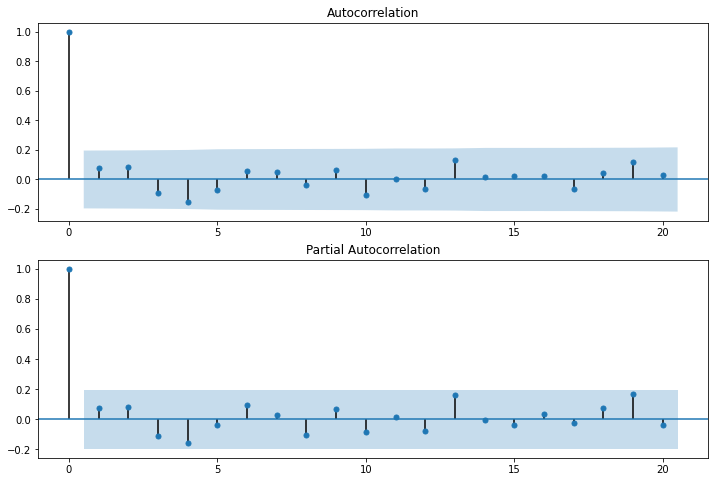

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, ax=ax2)

# Exercício 03: 

Aplicar ARIMA de ordem (p=1,d=1,q=1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
modelo = ARIMA(df['valor'], order=(1,1,1))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.valor   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -147.967
Method:                       css-mle   S.D. of innovations              1.055
Date:                Wed, 09 Feb 2022   AIC                            303.934
Time:                        00:46:53   BIC                            314.315
Sample:                    01-02-2020   HQIC                           308.134
                         - 04-09-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.004      0.402      0.688      -0.006       0.009
ar.L1.D.valor     0.0868      0.101      0.863      0.390      -0.110       0.284
ma.L1.D.valor    -1.0000      0.034    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
modelo_fit.predict()

2020-01-02    0.001606
2020-01-03   -0.681435
2020-01-04    0.116996
2020-01-05   -0.085365
2020-01-06    1.515285
                ...   
2020-04-05   -0.339883
2020-04-06    0.396084
2020-04-07    1.587248
2020-04-08   -0.325055
2020-04-09    0.708685
Freq: D, Length: 99, dtype: float64

# Exercício 04: 

Aplicar ARIMA para estimar os 10 valores posteriores a n. Faça um gráfico: Real x Estimado.

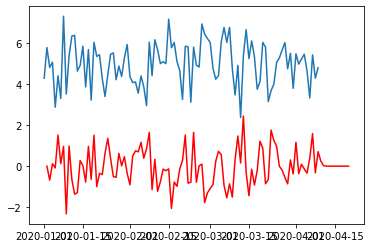

In [ ]:
inicio=1
# Fim a predição com mais 10 valores posteriores
fim=len(df)+10

predicoes=modelo_fit.predict(start=inicio,end=fim).rename('Predições ARIMA')

plt.plot(df)
plt.plot(predicoes,color='red' )

 

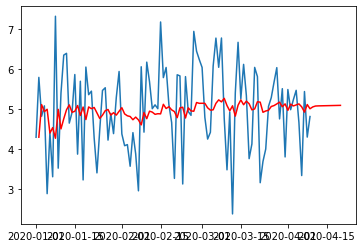

In [ ]:
inicio=1
# Fim a predição com mais 10 valores posteriores
fim=len(df)+10

predicoes=modelo_fit.predict(start=inicio,end=fim,typ='levels' ).rename('Predições ARIMA')

plt.plot(df)
plt.plot(predicoes,color='red' )